<a href="https://colab.research.google.com/github/revinarnan/website-classification/blob/main/Website_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Website Classification



# Import Library & Load File

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
dataset = '/content/drive/My Drive/website_classification.csv'
data = pd.read_csv(dataset)
data.head(5)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


# Explore Dataset

In [ ]:
#Drop kolom Unnamed: 0 dan website url karena tidak dibutuhkan dalam model
df= data.drop(['Unnamed: 0', 'website_url'], axis= 1)
df

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel
...,...,...
1403,old nude women porn mature granny sex horny ol...,Adult
1404,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,porno dvd online european porn dvd cheap adult...,Adult
1406,anal dream house anal dream house anal dream h...,Adult


In [ ]:
#Cek apakah terdapat missing record
df.isnull().sum()

cleaned_website_text    0
Category                0
dtype: int64

In [ ]:
#Menghitung jumlah masing-masing nilai unik dari kolom Category
df.Category.value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
Health and Fitness                  96
News                                96
Computers and Technology            93
Photography                         93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: Category, dtype: int64

In [ ]:
#Mengetahui informasi dalam dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_website_text  1408 non-null   object
 1   Category              1408 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


In [ ]:
#Melihat susunan/jumlah Rows dan Columns pada dataframe
df.shape

(1408, 2)

In [ ]:
#Mengetahui jumlah nilai unik dari kolom 'cleaned_website_text'
df.cleaned_website_text.nunique()

1375

# Cleaning

Dari jumlah kolom dengan nilai unik kolom terdapat perbedaan jumlah. Ini menandakan bahwa terdapat duplikasi data pada kolom 'cleaned_website_text'. Data duplikat akan dihapus.

In [ ]:
#Menghapus data duplikat pada kolom 'cleaned_website_text'
clean_df = df.drop_duplicates(subset='cleaned_website_text').reset_index(drop=True)
clean_df.shape

(1375, 2)

In [ ]:
clean_df

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel
...,...,...
1370,old nude women porn mature granny sex horny ol...,Adult
1371,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1372,porno dvd online european porn dvd cheap adult...,Adult
1373,anal dream house anal dream house anal dream h...,Adult


# Data Preparation


In [ ]:
import nltk
nltk.download(['stopwords', 'punkt', 'averaged_perceptron_tagger',
               'universal_tagset'], quiet=True)
from nltk.tokenize import word_tokenize

In [ ]:
#Mengambil kata dengan tipe 'NOUN' menggunakan post_tag, tokenize, universal_tagset
filtered_words = []
for i in range(clean_df.shape[0]):
  tagged = nltk.pos_tag(word_tokenize(clean_df.cleaned_website_text[i]),
                        tagset='universal')
  filtered_words.append(' '.join([word_tag[0] for word_tag in tagged if word_tag[1]=='NOUN']))

In [ ]:
#Menambahkan 'filtered_words' ke dalam clean_df dataframe
clean_df['filtered_words'] = filtered_words
clean_df.head()

,cleaned_website_text,Category,filtered_words
0,official site good hotel accommodation big sav...,Travel,site hotel accommodation hotel destination hot...
1,expedia hotel book sites like use vacation wor...,Travel,hotel book sites use vacation work year day da...
2,tripadvisor hotel book sites like previously d...,Travel,hotel book sites bar review year tripadvisor h...
3,cheap flights search compare flights momondo f...,Travel,flights search flights flight momondo airline ...
4,bot create free account create free account si...,Travel,bot account account sign sign account ebooker ...


In [ ]:
#Menghitung jumlah kata unik dalam seluruh dokumen
from collections import Counter

array_text = ' '.join(clean_df['filtered_words'].values)
array_text = array_text.split()

word_count = Counter(array_text)
len(word_count)

43574

# Split Train Test

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score 
from sklearn.metrics import mean_absolute_error as mae, recall_score, f1_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#TFIDF Vectorizer, mengukur bobot dengan mengambil 1500 dari 43574 variasi kata sebagai features
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        stop_words = 'english', max_features = 1500)
feat = tfidf.fit_transform(clean_df.filtered_words)

In [ ]:
#Mendefinisikan features X dan mengkonversi hasil vektorisasi TFIDF ke dalam dataframe
X = pd.DataFrame(feat.toarray(), columns=tfidf.get_feature_names())
X

,ability,academy,access,accessibility,accessories,accessory,accommodation,accord,account,act,action,activity,ad,add,addition,address,administration,admission,adult,advance,advantage,adventure,advertise,advertisement,advertising,advice,affairs,affiliate,africa,age,agency,agent,agreement,aid,aim,air,aircraft,airport,al,algebra,...,ways,weather,web,website,wedding,week,weekend,wellness,west,whatsapp,wi,wife,wikipedia,wildlife,win,window,windows,wine,winner,winter,woman,women,wood,word,work,worker,world,worldwide,writer,wwe,xml,yang,year,yesterday,yoga,york,youth,youtube,zealand,zone
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.152535,0.000000,0.099583,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.059276,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.068097,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.063414,0.0,0.0,0.0,0.0,0.0,0.0,0.076034,0.0,0.00000,0.0,0.0,0.0,0.098462,0.000000,0.000000,0.0,0.054306,0.075821,0.0,0.030850,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.043554,0.0,0.0,0.0,0.157686,0.000000,0.000000,0.0,0.000000,0.054456,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.062159,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.049962,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.108125,0.049191,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.068932,0.0,0.076103,0.000000,0.070103,0.0,0.000000,0.0,0.067054,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.249843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.088950,0.000000,0.0,0.085555,0.000000,0.111074,0.0,0.000000,0.0,0.106243,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.091655,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.099412,0.0,0.0,0.0,0.0,0.081367,0.0,0.0,0.190998,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.042847,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.038485,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.137294,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.084265,0.000000,0.179397,0.0,0.060564,0.061071,0.000000,0.0,0.0,0.153124,0.0,0.0,0.000000,0.0,0.0,0.000000,0.069913,0.0,0.000000,0.0,0.0,0.078947,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.057781,0.055167,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.26859,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.076609,0.0,0.0,0.000000,0.0,0.096465,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.086741,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.058212,0.065675,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.101719,0.274354,0.0,0.000000,0.0,0.0,0.0,0.0
1371,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0

In [ ]:
#Mendefinisikan label y dan mengkonversi kolom 'Category' berbentuk string agar menjadi integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(clean_df.Category)
y

array([15, 15, 15, ...,  0,  0,  0])

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

# Balancing Data

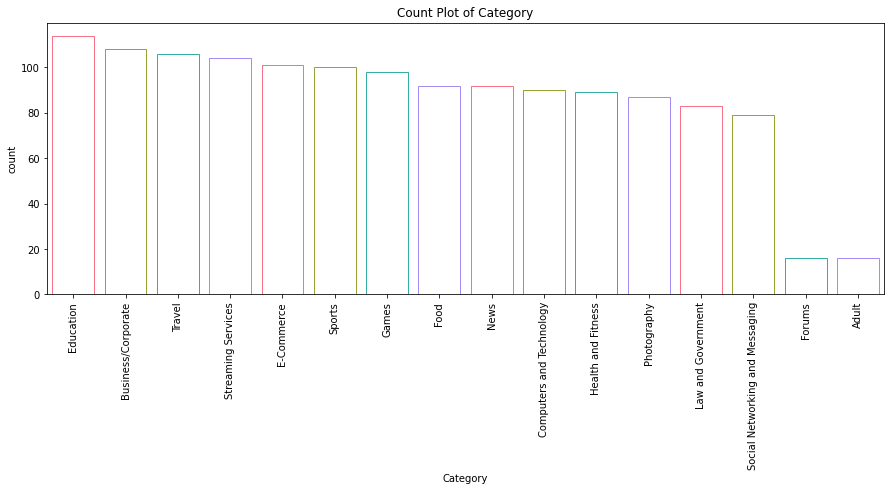

In [ ]:
#Melihat jumlah tiap label dengan menggunakan visualisasi
labels = list(clean_df['Category'].value_counts().index)

def showcountplot(plotuse,text=None,showtext = False):
    if text==None:
        text = []
    plt.figure(figsize=(15,5))
    ax = sns.countplot(plotuse,facecolor=(0, 0, 0, 0),
                       linewidth=1,
                       edgecolor=sns.color_palette("husl",4),
                       order = plotuse.value_counts().index)
    #Set a title
    ax.set_title(f"Count Plot of {plotuse.name}")
    #Create text
    for index,value in enumerate(plotuse.value_counts()):
        if text == []:
            ax.set_xticklabels("")
        else:
            ax.set_xticklabels(text,rotation=90) 
    #Show our plot
    plt.show()

showcountplot(clean_df["Category"],text=labels,showtext=True)

In [ ]:
#Melakukan balancing data dengan algoritma SMOTE + TomekLinks
from imblearn.combine import SMOTETomek

st = SMOTETomek()
X_st, y_st = st.fit_resample(X_train, y_train)
print("SMOTE + TomekLinks")
print(f"Shape dari y: {len(y_st)}, dimana jumlah : {Counter(y_st)}")

SMOTE + TomekLinks
Shape dari y: 1306, dimana jumlah : Counter({14: 82, 5: 82, 4: 82, 1: 82, 8: 82, 11: 82, 10: 82, 3: 82, 6: 82, 0: 82, 15: 81, 7: 81, 9: 81, 12: 81, 2: 81, 13: 81})


# Training

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Training and test model Random Forest (Balanced)
random_forest = RandomForestClassifier(random_state=0)
learnerRF = random_forest.fit(X_st, y_st)
Y_predRF = random_forest.predict(X_test)

score_rf = round(random_forest.score(X_st, y_st), 3)
accuracy_rf = round(accuracy_score(y_test,Y_predRF), 3)
precision_rf = round(precision_score(y_test, Y_predRF,average='weighted'), 3)
recall_rf = round(recall_score(y_test, Y_predRF,average='weighted'), 3)
f1_rf = round(f1_score(y_test,Y_predRF,average='weighted'), 3)

In [ ]:
#Training and test dari model Multinomial Naive Bayes (Balanced)
nb = MultinomialNB()
learnerNB = nb.fit(X_st, y_st)
Y_pred = nb.predict(X_test) 

score_nb = round(nb.score(X_st, y_st), 3)
accuracy_nb = round(accuracy_score(y_test,Y_pred), 3)
precision_nb = round(precision_score(y_test, Y_pred,average='weighted'), 3)
recall_nb = round(recall_score(y_test, Y_pred,average='weighted'), 3)
f1_nb = round(f1_score(y_test,Y_pred,average='weighted'), 3)

# Result

In [ ]:
#Menampilkan hasil matrix score dalam dataframe
results = pd.DataFrame({
    'model': [ 'Random Forest', 'Multinomial Naive Bayes'],
    'train_score': [ score_rf, score_nb],
    'accuracy_score': [accuracy_rf, accuracy_nb],
    'precision': [precision_rf, precision_nb],
    'recall': [recall_rf, recall_nb],
    'f1_score': [f1_rf, f1_nb],
    'mean_absolute_error': [mae(y_test, Y_predRF), mae(y_test, Y_pred)],
    })
result_df = results.sort_values(by='accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df

,model,train_score,accuracy_score,precision,recall,f1_score,mean_absolute_error
0,Multinomial Naive Bayes,0.964,0.913,0.918,0.913,0.913,0.590799
1,Random Forest,0.998,0.872,0.875,0.872,0.871,0.682809


In [ ]:
#Match hasil Label Encoder dengan nilai pada Category
y1 = le.inverse_transform(y_st)
label = pd.DataFrame(data={'Label_Encoder':y_st, 'Category':y1})
label_df = label.drop_duplicates()
label_df = label_df.sort_values(by='Label_Encoder', ascending=True)
label_df = label_df.reset_index(drop=True)
label_df

,Label_Encoder,Category
0,0,Adult
1,1,Business/Corporate
2,2,Computers and Technology
3,3,E-Commerce
4,4,Education
5,5,Food
6,6,Forums
7,7,Games
8,8,Health and Fitness
9,9,Law and Government


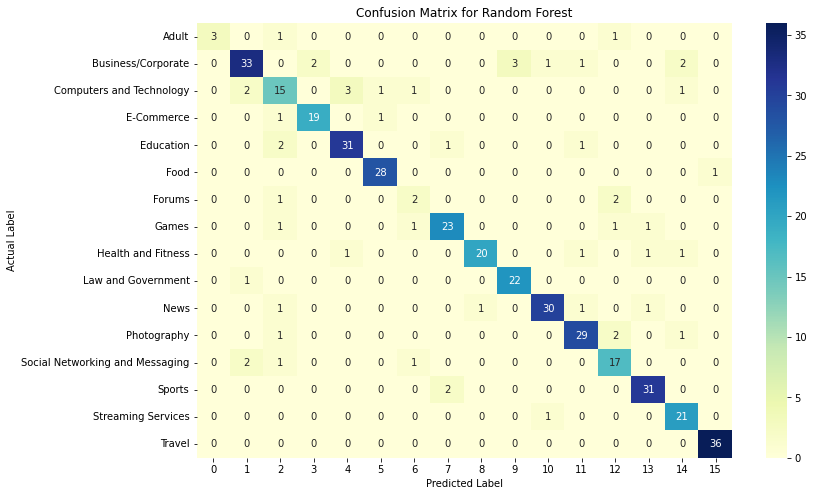

In [ ]:
#Menampilkan confusiom matrix dari hasil test Random Forest
cm_rf = confusion_matrix(y_test, Y_predRF)
plt.subplots(figsize=(12,8))
sns.heatmap(pd.DataFrame(cm_rf), annot=True, cmap="YlGnBu",
            fmt='g', yticklabels=label_df['Category'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

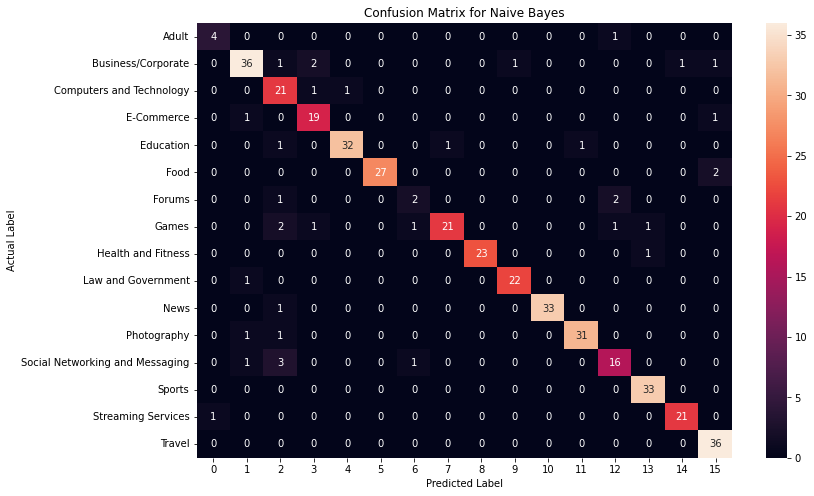

In [ ]:
#Menampilkan confusion matrix dari hasil test Naive Bayes
cm_nb = confusion_matrix(y_test, Y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(pd.DataFrame(cm_nb), annot=True,fmt='g',
            yticklabels=label_df['Category'])
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()